### 個体差チェック

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from sklearn.cluster import KMeans
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

In [4]:
# データを取得
df2_8 = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset8.csv")
df2_9 = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset9.csv")
df2_10 = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset10.csv")
df4_8 = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset8.csv")
df4_9 = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset9.csv")
df4_10 = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset10.csv")

#それぞれのカラム名の指定
df2_8.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
df2_9.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
df2_10.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
df4_8.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
df4_9.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
df4_10.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]

# 発信機ごとに種類分け
#受信機2のパターン8
df2_8_1 = df2_8[df2_8['UUIDs']  == "10000000aaaa41441111110000000000"]
df2_8_2 = df2_8[df2_8['UUIDs']  == "20000000aaaa41441111110000000000"]
df2_8_3 = df2_8[df2_8['UUIDs']  == "30000000aaaa41441111110000000000"]
df2_8_4 = df2_8[df2_8['UUIDs']  == "40000000aaaa41441111110000000000"]
df2_8_5 = df2_8[df2_8['UUIDs']  == "50000000aaaa41441111110000000000"]
df2_8_6 = df2_8[df2_8['UUIDs']  == "60000000aaaa41441111110000000000"]

#受信機2のパターン9
df2_9_1 = df2_9[df2_9['UUIDs']  == "10000000aaaa41441111110000000000"]
df2_9_2 = df2_9[df2_9['UUIDs']  == "20000000aaaa41441111110000000000"]
df2_9_3 = df2_9[df2_9['UUIDs']  == "30000000aaaa41441111110000000000"]
df2_9_4 = df2_9[df2_9['UUIDs']  == "40000000aaaa41441111110000000000"]
df2_9_5 = df2_9[df2_9['UUIDs']  == "50000000aaaa41441111110000000000"]
df2_9_6 = df2_9[df2_9['UUIDs']  == "60000000aaaa41441111110000000000"]

#受信機2のパターン10
df2_10_1 = df2_10[df2_10['UUIDs']  == "10000000aaaa41441111110000000000"]
df2_10_2 = df2_10[df2_10['UUIDs']  == "20000000aaaa41441111110000000000"]
df2_10_3 = df2_10[df2_10['UUIDs']  == "30000000aaaa41441111110000000000"]
df2_10_4 = df2_10[df2_10['UUIDs']  == "40000000aaaa41441111110000000000"]
df2_10_5 = df2_10[df2_10['UUIDs']  == "50000000aaaa41441111110000000000"]
df2_10_6 = df2_10[df2_10['UUIDs']  == "60000000aaaa41441111110000000000"]

#受信機4のパターン8
df4_8_1 = df4_8[df4_8['UUIDs']  == "10000000aaaa41441111110000000000"]
df4_8_2 = df4_8[df4_8['UUIDs']  == "20000000aaaa41441111110000000000"]
df4_8_3 = df4_8[df4_8['UUIDs']  == "30000000aaaa41441111110000000000"]
df4_8_4 = df4_8[df4_8['UUIDs']  == "40000000aaaa41441111110000000000"]
df4_8_5 = df4_8[df4_8['UUIDs']  == "50000000aaaa41441111110000000000"]
df4_8_6 = df4_8[df4_8['UUIDs']  == "60000000aaaa41441111110000000000"]

#受信機4のパターン9
df4_9_1 = df4_9[df4_9['UUIDs']  == "10000000aaaa41441111110000000000"]
df4_9_2 = df4_9[df4_9['UUIDs']  == "20000000aaaa41441111110000000000"]
df4_9_3 = df4_9[df4_9['UUIDs']  == "30000000aaaa41441111110000000000"]
df4_9_4 = df4_9[df4_9['UUIDs']  == "40000000aaaa41441111110000000000"]
df4_9_5 = df4_9[df4_9['UUIDs']  == "50000000aaaa41441111110000000000"]
df4_9_6 = df4_9[df4_9['UUIDs']  == "60000000aaaa41441111110000000000"]

#受信機4のパターン10
df4_10_1 = df4_10[df4_10['UUIDs']  == "10000000aaaa41441111110000000000"]
df4_10_2 = df4_10[df4_10['UUIDs']  == "20000000aaaa41441111110000000000"]
df4_10_3 = df4_10[df4_10['UUIDs']  == "30000000aaaa41441111110000000000"]
df4_10_4 = df4_10[df4_10['UUIDs']  == "40000000aaaa41441111110000000000"]
df4_10_5 = df4_10[df4_10['UUIDs']  == "50000000aaaa41441111110000000000"]
df4_10_6 = df4_10[df4_10['UUIDs']  == "60000000aaaa41441111110000000000"]

パターン1
<img src="./RSSI取得実験図/個体差チェック1.pdf" alt="パターン1">

パターン2
<img src="./RSSI取得実験図/個体差チェック2.pdf" alt="パターン2">

パターン3
<img src="./RSSI取得実験図/個体差チェック3.pdf" alt="パターン3">

### 受信機ごとの分布

受信機2のパターン8
データ数:17398
平均値:-82.10179330957581
分散:5.452416476748843

受信機4のパターン8
データ数:20843
平均値:-83.04466727438468
分散:5.465436997367202

受信機2のパターン9
データ数:18669
平均値:-84.51470351920295
分散:4.685886506160294

受信機4のパターン9
データ数:18418
平均値:-82.52443262026279
分散:5.997101186225478

受信機2のパターン10
データ数:19228
平均値:-83.20964218847514
分散:5.022133008822229

受信機4のパターン10
データ数:18603
平均値:-82.77444498199215
分散:5.192621132076645



/Users/tomanan/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


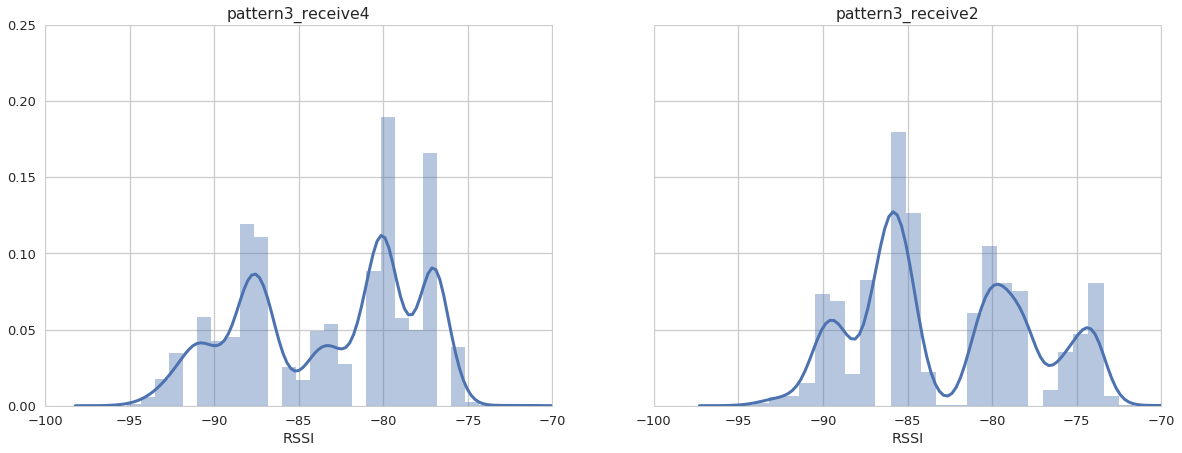

In [11]:
#fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
#fig, (ax3, ax4) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
fig, (ax5, ax6) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
#ax1.set_xlim([-100,-70])
#ax1.set_ylim([0,0.25])
#ax3.set_xlim([-100,-70])
#ax3.set_ylim([0,0.25])
ax5.set_xlim([-100,-70])
ax5.set_ylim([0,0.25])
#ax1.set_title("pattern1_receive4")
#ax2.set_title("pattern1_receive2")
#ax3.set_title("pattern2_receive4")
#ax4.set_title("pattern2_receive2")
ax5.set_title("pattern3_receive4")
ax6.set_title("pattern3_receive2")
#sns.distplot(df2_8["RSSI"],bins=30,ax=ax1)
#sns.distplot(df4_8["RSSI"],bins=30,ax=ax2)
#sns.distplot(df2_9["RSSI"],bins=30,ax=ax3)
#sns.distplot(df4_9["RSSI"],bins=30,ax=ax4)
sns.distplot(df2_10["RSSI"],bins=30,ax=ax5)
sns.distplot(df4_10["RSSI"],bins=30,ax=ax6)

print("受信機2のパターン8")
print("データ数:%s" %df2_8["RSSI"].count())
print("平均値:%s" %df2_8["RSSI"].mean())
print("分散:%s\n" %df2_8["RSSI"].std())

print("受信機4のパターン8")
print("データ数:%s" %df4_8["RSSI"].count())
print("平均値:%s" %df4_8["RSSI"].mean())
print("分散:%s\n" %df4_8["RSSI"].std())

print("受信機2のパターン9")
print("データ数:%s" %df2_9["RSSI"].count())
print("平均値:%s" %df2_9["RSSI"].mean())
print("分散:%s\n" %df2_9["RSSI"].std())

print("受信機4のパターン9")
print("データ数:%s" %df4_9["RSSI"].count())
print("平均値:%s" %df4_9["RSSI"].mean())
print("分散:%s\n" %df4_9["RSSI"].std())

print("受信機2のパターン10")
print("データ数:%s" %df2_10["RSSI"].count())
print("平均値:%s" %df2_10["RSSI"].mean())
print("分散:%s\n" %df2_10["RSSI"].std())

print("受信機4のパターン10")
print("データ数:%s" %df4_10["RSSI"].count())
print("平均値:%s" %df4_10["RSSI"].mean())
print("分散:%s\n" %df4_10["RSSI"].std())

plt.savefig("difference3.png")

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
ax1.set_xlim([-100,-70])
ax1.set_ylim([0,0.25])

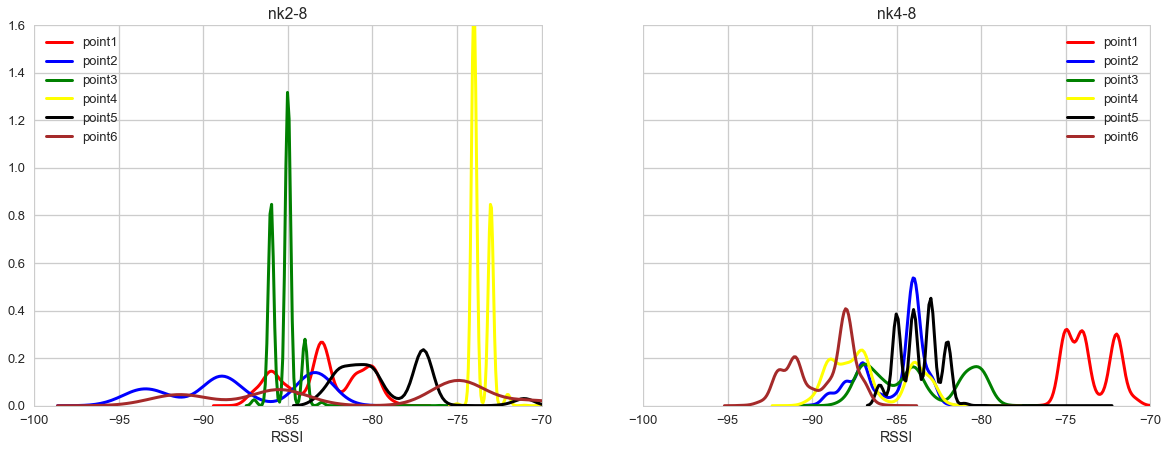

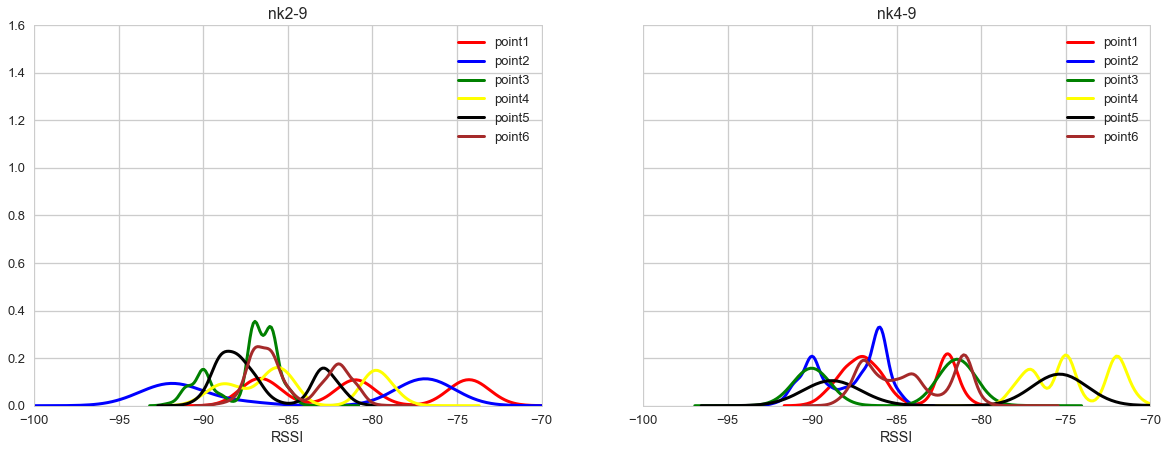

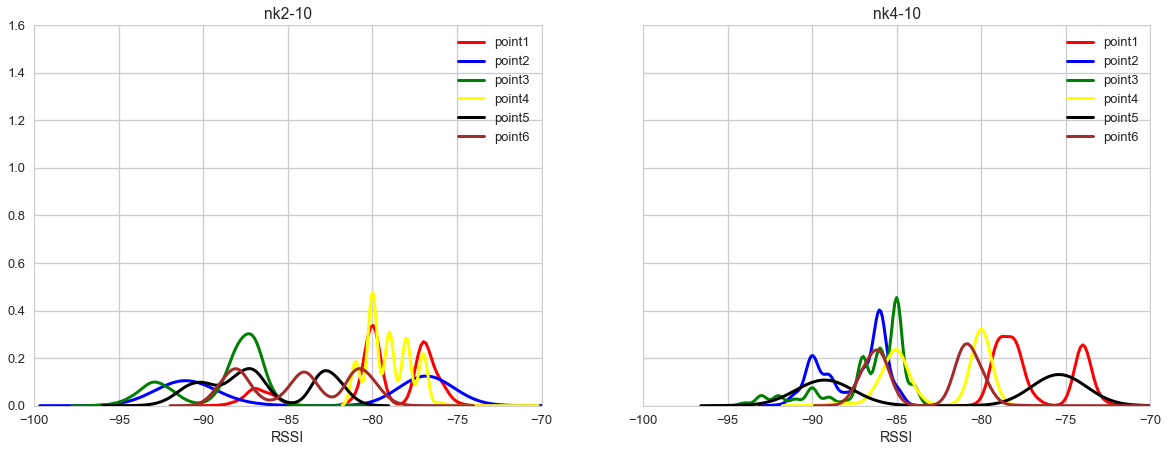

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
fig, (ax3, ax4) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
fig, (ax5, ax6) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)

ax1.set_xlim([-100,-70])
ax1.set_ylim([0,1.6])
ax3.set_xlim([-100,-70])
ax3.set_ylim([0,1.6])
ax5.set_xlim([-100,-70])
ax5.set_ylim([0,1.6])
ax1.set_title("nk2-8")
ax2.set_title("nk4-8")
ax3.set_title("nk2-9")
ax4.set_title("nk4-9")
ax5.set_title("nk2-10")
ax6.set_title("nk4-10")

sns.distplot(df2_8_1["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax1)
sns.distplot(df2_8_2["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax1)
sns.distplot(df2_8_3["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax1)
sns.distplot(df2_8_4["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax1)
sns.distplot(df2_8_5["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax1)
sns.distplot(df2_8_6["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax1)

sns.distplot(df4_8_1["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax2)
sns.distplot(df4_8_2["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax2)
sns.distplot(df4_8_3["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax2)
sns.distplot(df4_8_4["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax2)
sns.distplot(df4_8_5["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax2)
sns.distplot(df4_8_6["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax2)

sns.distplot(df2_9_1["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax3)
sns.distplot(df2_9_2["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax3)
sns.distplot(df2_9_3["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax3)
sns.distplot(df2_9_4["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax3)
sns.distplot(df2_9_5["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax3)
sns.distplot(df2_9_6["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax3)

sns.distplot(df4_9_1["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax4)
sns.distplot(df4_9_2["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax4)
sns.distplot(df4_9_3["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax4)
sns.distplot(df4_9_4["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax4)
sns.distplot(df4_9_5["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax4)
sns.distplot(df4_9_6["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax4)

sns.distplot(df2_10_1["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax5)
sns.distplot(df2_10_2["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax5)
sns.distplot(df2_10_3["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax5)
sns.distplot(df2_10_4["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax5)
sns.distplot(df2_10_5["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax5)
sns.distplot(df2_10_6["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax5)

sns.distplot(df4_10_1["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax6)
sns.distplot(df4_10_2["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax6)
sns.distplot(df4_10_3["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax6)
sns.distplot(df4_10_4["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax6)
sns.distplot(df4_10_5["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax6)
sns.distplot(df4_10_6["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax6)

In [17]:
df2_10

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp
0,40000000aaaa41441111110000000000,2,35,0.953337,near,-78,-77,nkmr-2,2017/11/09 19:24:22
1,60000000aaaa41441111110000000000,2,39,1.048947,near,-78,-79,nkmr-2,2017/11/09 19:24:22
2,30000000aaaa41441111110000000000,2,34,1.952310,near,-78,-92,nkmr-2,2017/11/09 19:24:22
3,20000000aaaa41441111110000000000,2,40,0.908852,near,-78,-76,nkmr-2,2017/11/09 19:24:22
4,40000000aaaa41441111110000000000,2,35,0.953337,near,-78,-77,nkmr-2,2017/11/09 19:24:22
5,50000000aaaa41441111110000000000,2,32,1.537381,near,-78,-87,nkmr-2,2017/11/09 19:24:22
6,60000000aaaa41441111110000000000,2,39,1.332051,near,-78,-84,nkmr-2,2017/11/09 19:24:22
7,10000000aaaa41441111110000000000,2,38,0.908852,near,-78,-76,nkmr-2,2017/11/09 19:24:22
8,20000000aaaa41441111110000000000,2,40,1.537381,near,-78,-87,nkmr-2,2017/11/09 19:24:22
9,40000000aaaa41441111110000000000,2,35,1.000000,near,-78,-78,nkmr-2,2017/11/09 19:24:22


In [16]:
df4_10

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp
0,40000000aaaa41441111110000000000,2,35,1.332051,near,-78,-84,nkmr-4,2017/11/09 19:12:11
1,20000000aaaa41441111110000000000,2,40,1.774360,near,-78,-90,nkmr-4,2017/11/09 19:12:11
2,50000000aaaa41441111110000000000,2,32,1.612630,near,-78,-88,nkmr-4,2017/11/09 19:12:11
3,60000000aaaa41441111110000000000,2,39,1.048947,near,-78,-79,nkmr-4,2017/11/09 19:12:11
4,10000000aaaa41441111110000000000,2,38,0.787467,near,-78,-73,nkmr-4,2017/11/09 19:12:11
5,60000000aaaa41441111110000000000,2,39,1.465642,near,-78,-86,nkmr-4,2017/11/09 19:12:11
6,30000000aaaa41441111110000000000,2,34,1.691564,near,-78,-89,nkmr-4,2017/11/09 19:12:11
7,40000000aaaa41441111110000000000,2,35,1.048947,near,-78,-79,nkmr-4,2017/11/09 19:12:11
8,20000000aaaa41441111110000000000,2,40,1.691564,near,-78,-89,nkmr-4,2017/11/09 19:12:11
9,60000000aaaa41441111110000000000,2,39,1.100289,near,-78,-80,nkmr-4,2017/11/09 19:12:11
